# Arc-edge Acreage

Solution to https://www.janestreet.com/puzzles/arc-edge-acreage-index/

## Approach

**First** we find all the shapes with straight edges (going diagonaly in the squares) than enclose an area of 32. We do this by starting from a larger shape than enclose as much area as possible, and by removing cubes from it.

We find that there are 44759572 such possibilites.

**Second** we replace straight edges by curvy ones. We need as many convex than concave curvy edges, so if the perimeter of a given shape is `k`, there are (k choose k/2) possibilities for filling that same shape with curvy edges.

In [1]:
from shapely import Polygon, MultiPolygon, Point, MultiPoint, LineString, LinearRing
import shapely as sh
import numpy as np
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import geopandas as gpd
import math

## 1) Find all shapes with straight edges

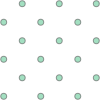

In [2]:
centers = []

for x in range(1, 7):
    for y in range(1, 7):
        if (x % 2 == 0) and (y % 2 == 0):
            centers.append((x, y))
        if (x % 2 == 1) and (y % 2 == 1):
            centers.append((x, y))
            
MultiPoint(centers)

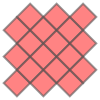

In [3]:
polygons = []

for center in centers:
    polygons.append(
        Polygon(
            [
                (center[0], center[1]-1),
                (center[0]+1, center[1]),
                (center[0], center[1]+1),
                (center[0]-1, center[1]),
            ]
        )
    )

full_shape = MultiPolygon(polygons)
full_shape

In [4]:
def get_union_shape_from_centers(centers):
    polygons = []

    for center in centers:
        polygons.append(
            Polygon(
                [
                    (center[0], center[1]-1),
                    (center[0]+1, center[1]),
                    (center[0], center[1]+1),
                    (center[0]-1, center[1]),
                ]
            )
        )

    return unary_union(MultiPolygon(polygons))

Ignoring the following shape


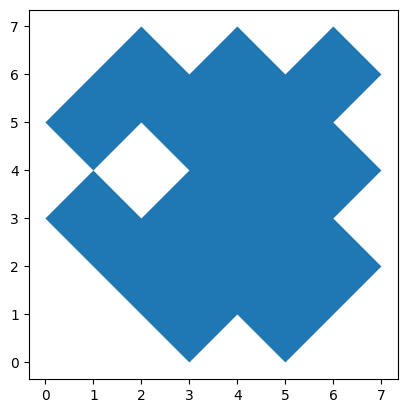

Ignoring the following shape


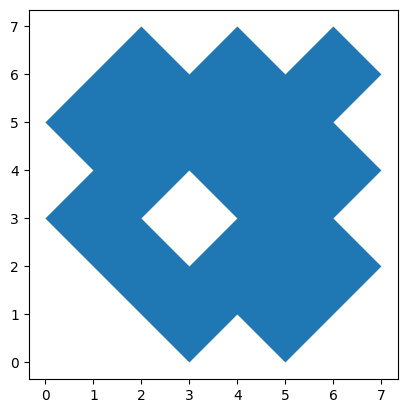

Ignoring the following shape


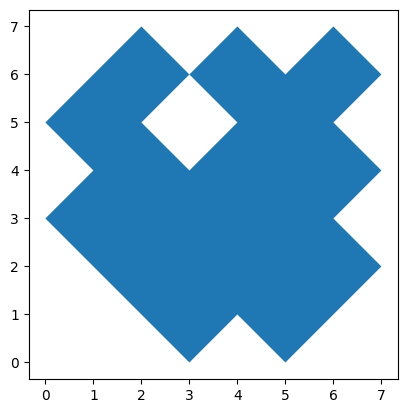

Ignoring the following shape


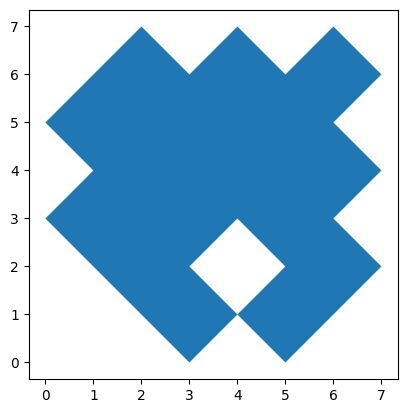

Ignoring the following shape


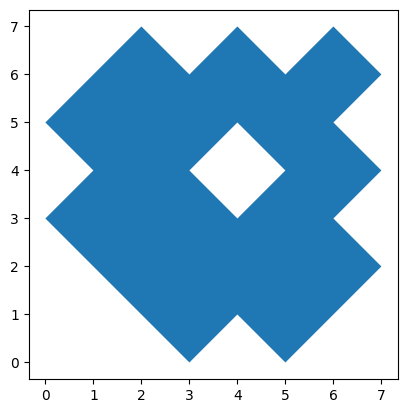

Ignoring the following shape


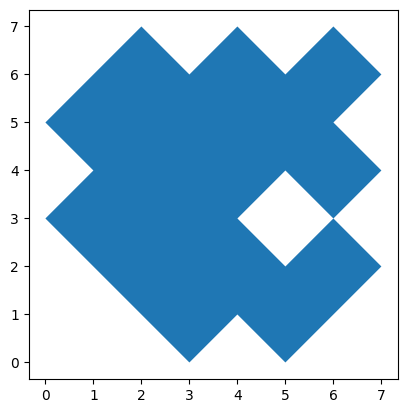

Ignoring the following shape


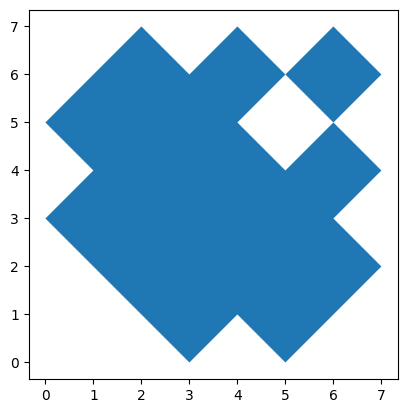

Ignoring the following shape


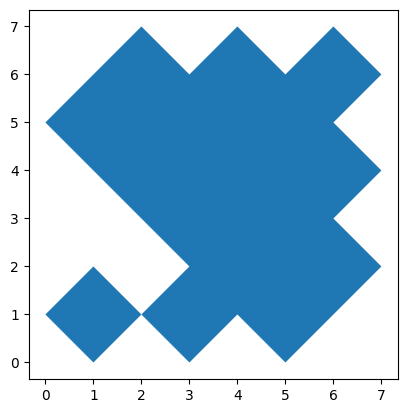

Ignoring the following shape


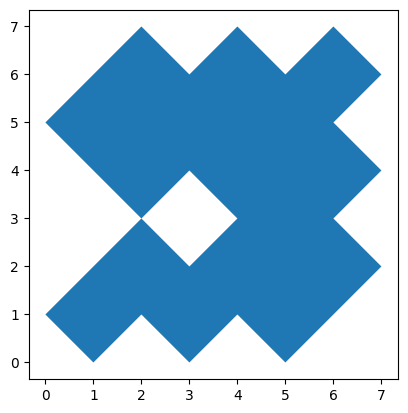

Ignoring the following shape


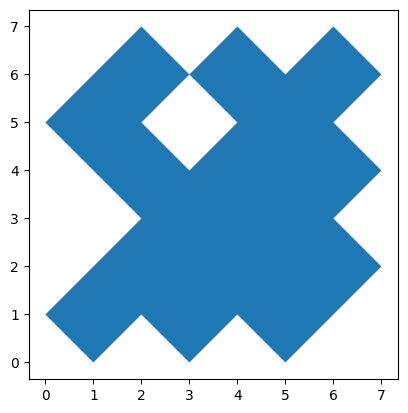

Ignoring the following shape


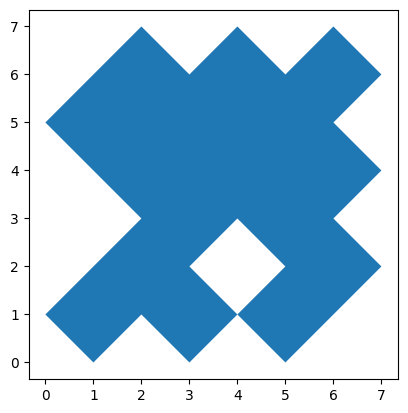

Ignoring the following shape


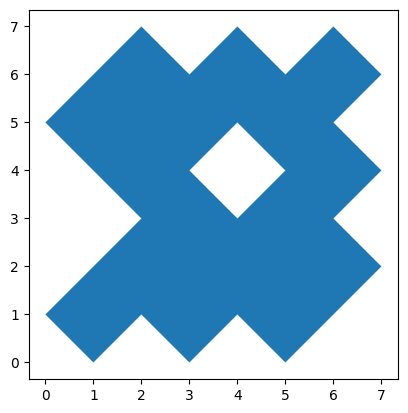

Ignoring the following shape


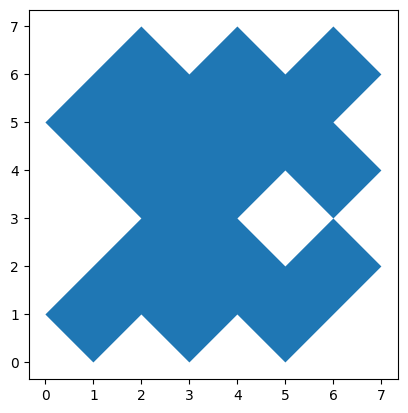

Ignoring the following shape


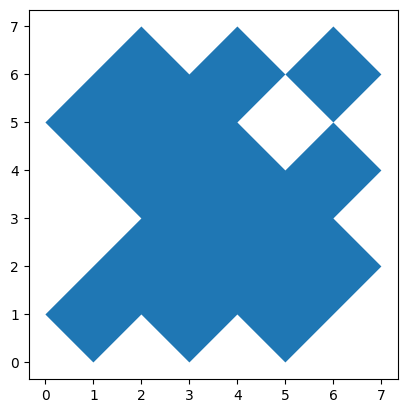

Ignoring the following shape


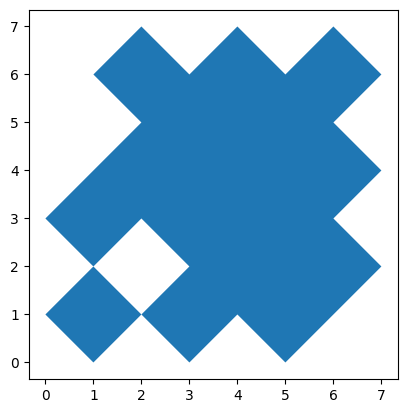

Ignoring the following shape


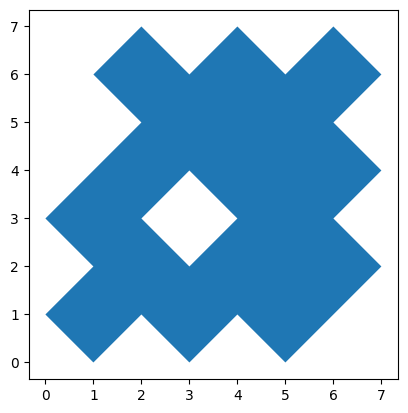

Ignoring the following shape


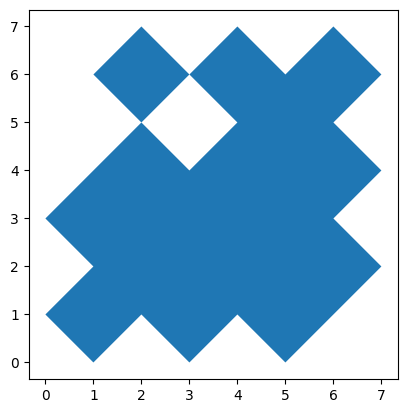

Ignoring the following shape


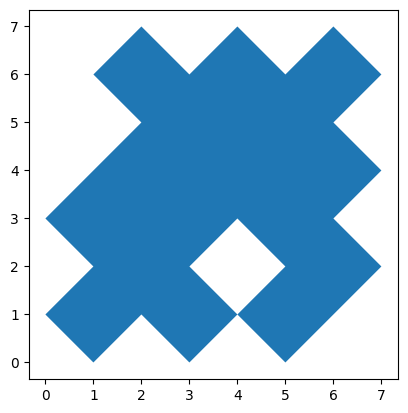

Ignoring the following shape


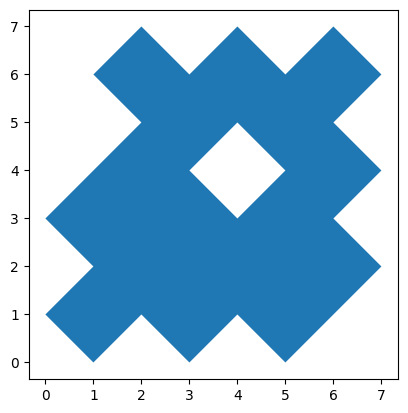

Ignoring the following shape


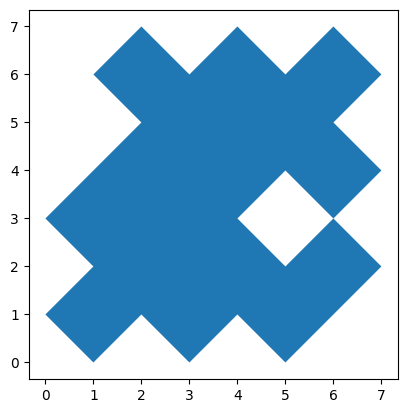

Ignoring the following shape


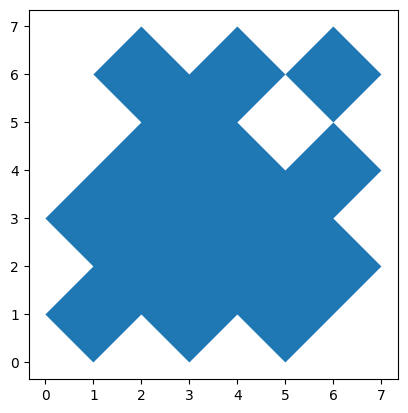

Ignoring the following shape


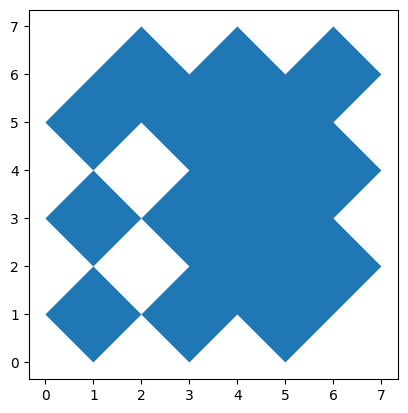

Ignoring the following shape


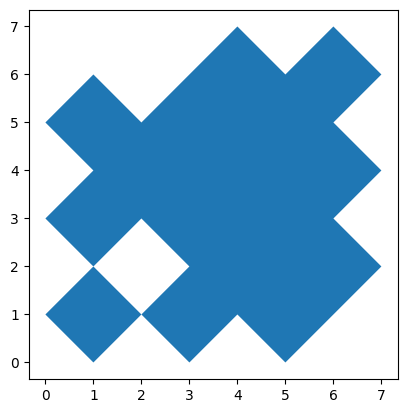

Ignoring the following shape


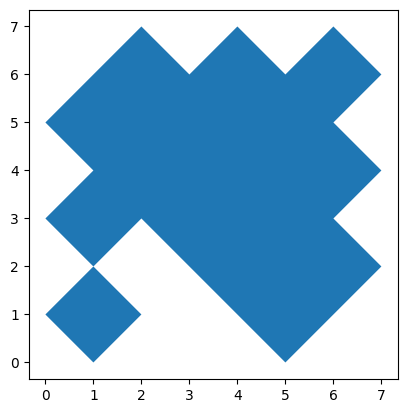

Ignoring the following shape


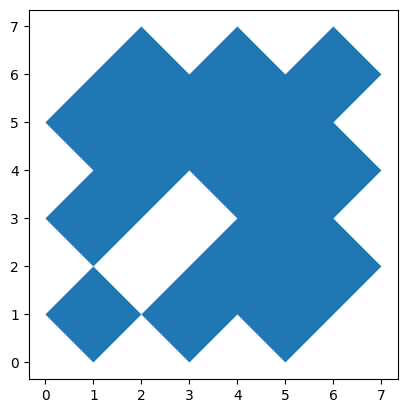

Ignoring the following shape


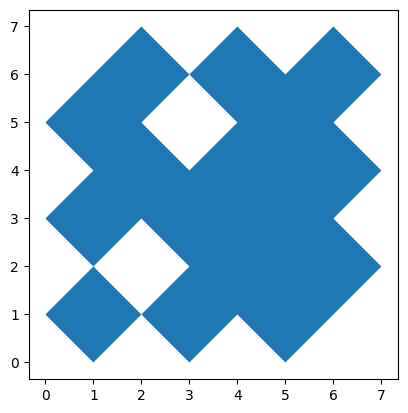

Ignoring the following shape


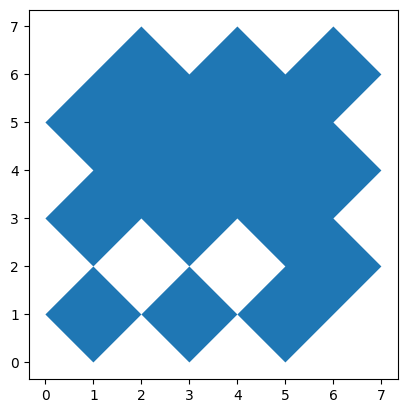

Ignoring the following shape


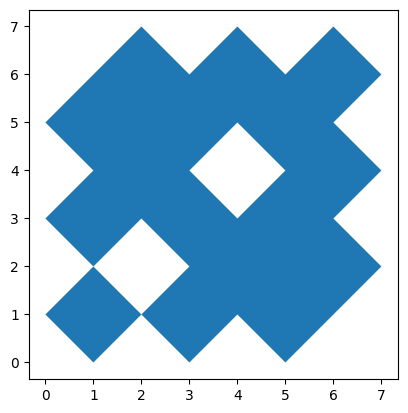

Ignoring the following shape


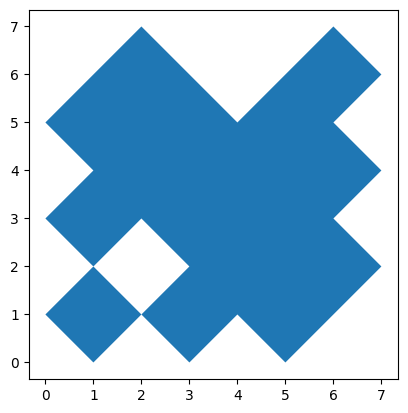

Ignoring the following shape


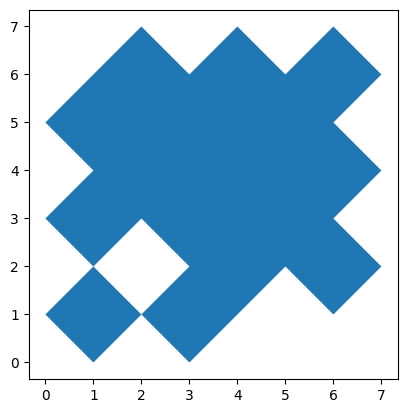

Ignoring the following shape


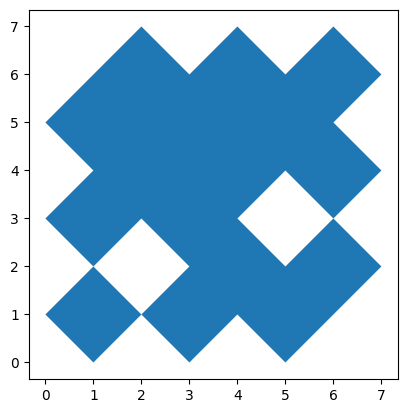

Ignoring the following shape


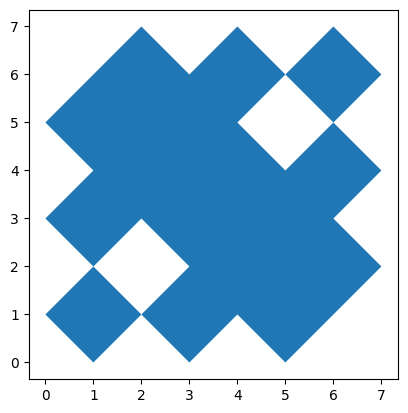

Ignoring the following shape


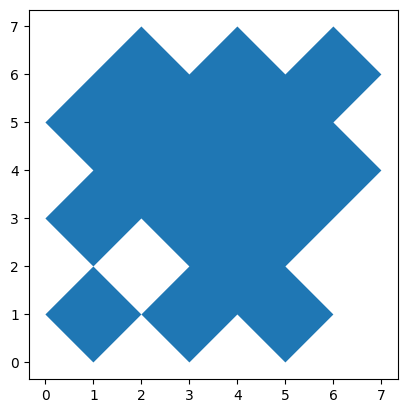

Ignoring the following shape


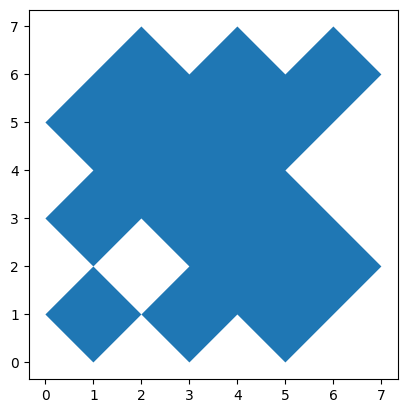

Ignoring the following shape


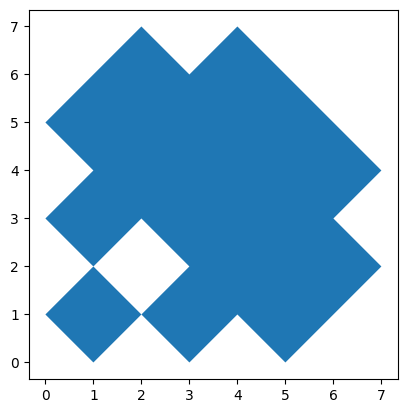

Ignoring the following shape


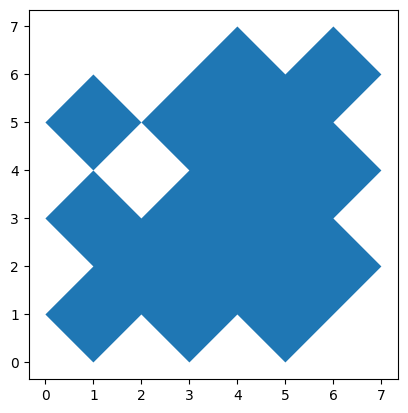

Ignoring the following shape


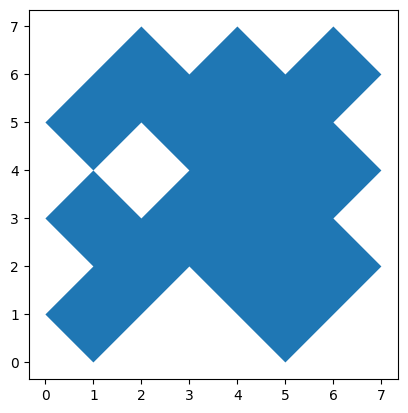

Ignoring the following shape


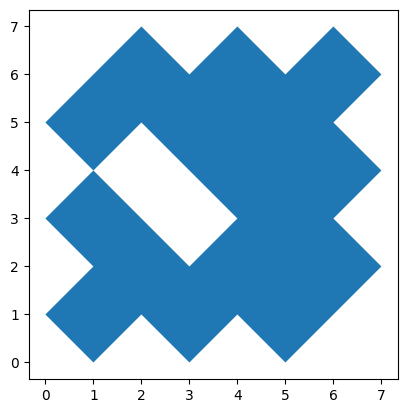

Ignoring the following shape


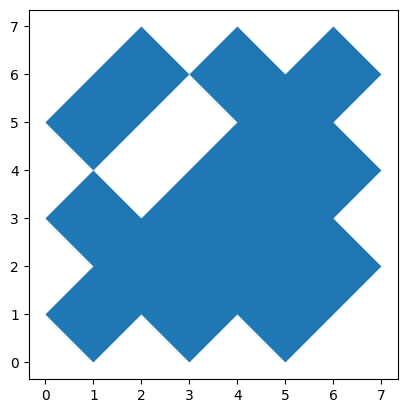

Ignoring the following shape


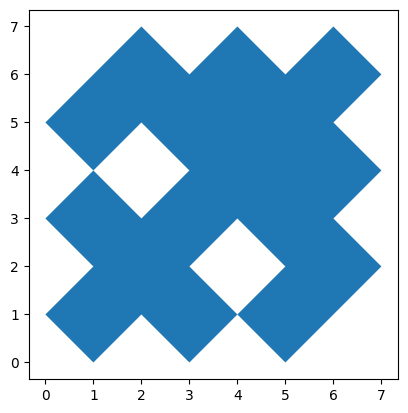

Ignoring the following shape


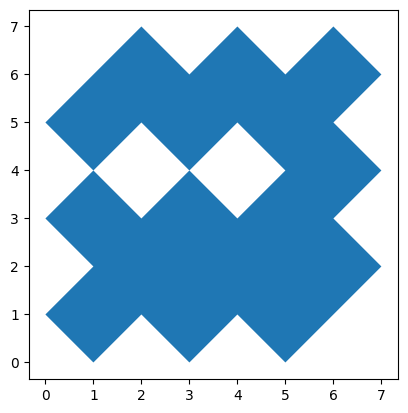

Ignoring the following shape


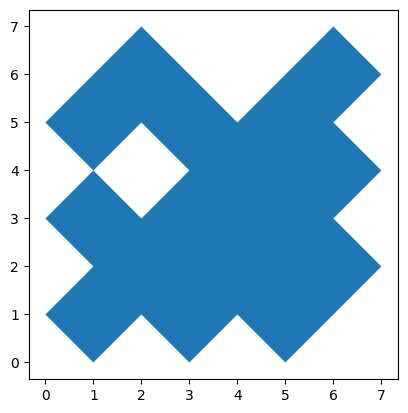

Ignoring the following shape


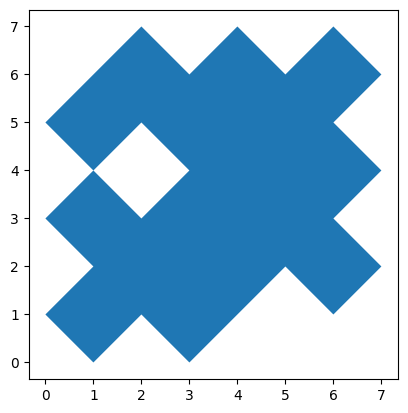

Ignoring the following shape


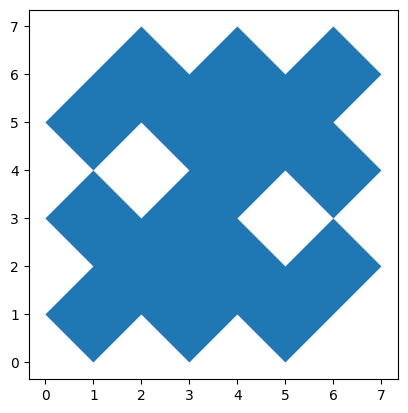

Ignoring the following shape


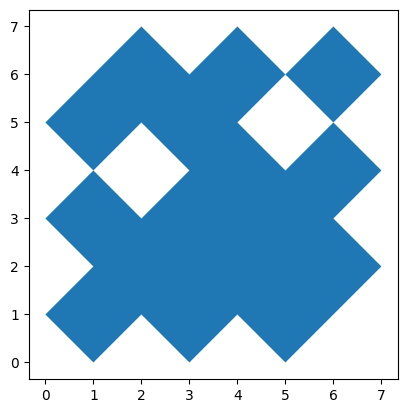

Ignoring the following shape


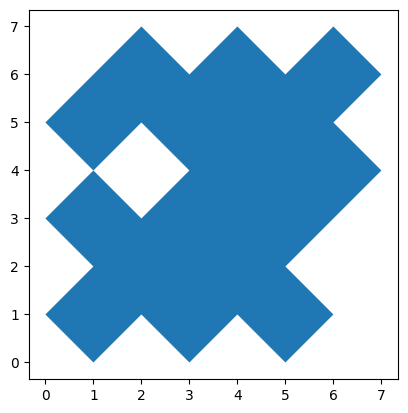

Ignoring the following shape


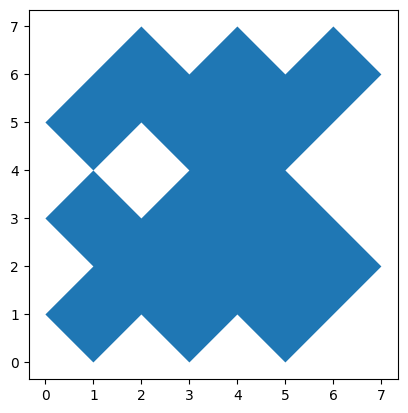

Ignoring the following shape


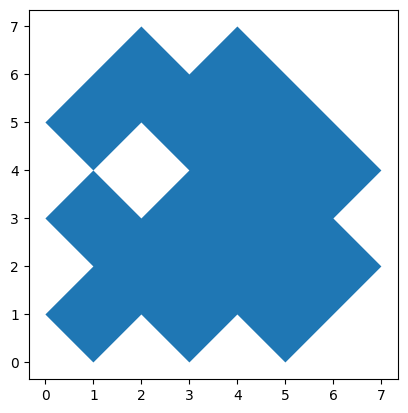

Ignoring the following shape


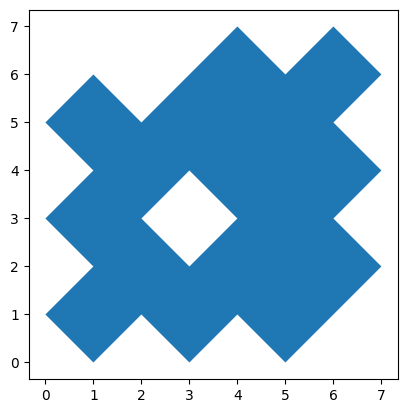

Ignoring the following shape


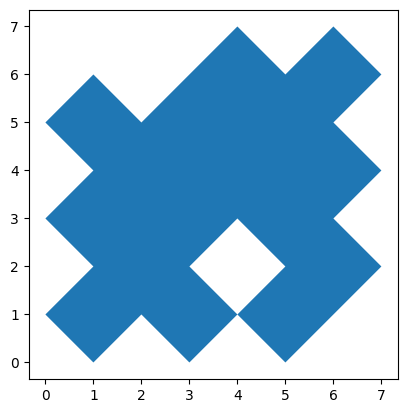

Ignoring the following shape


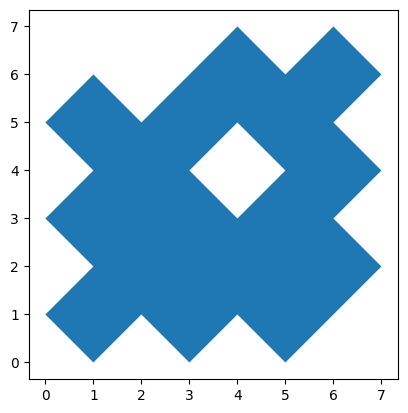

Ignoring the following shape


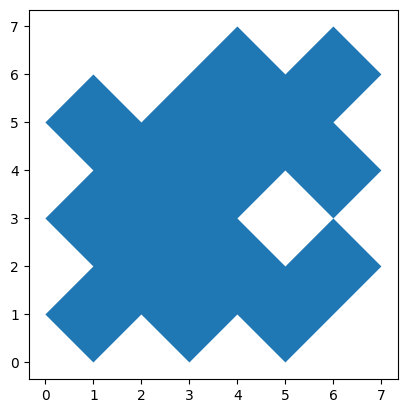

Ignoring the following shape


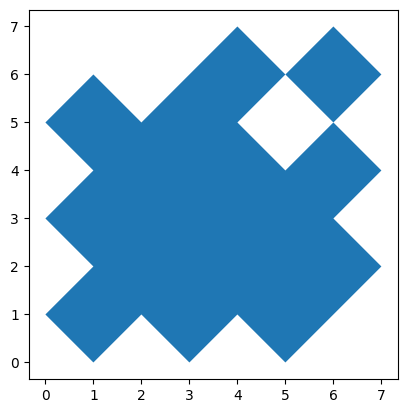

Ignoring the following shape


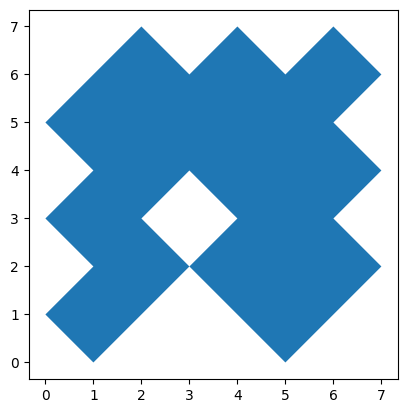

Ignoring the following shape


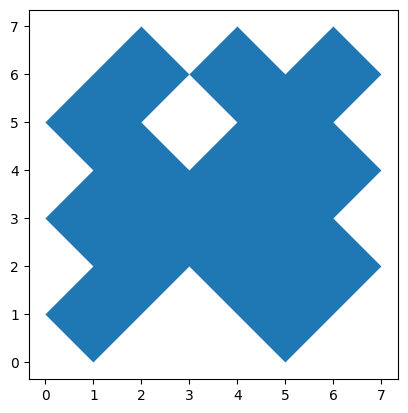

Ignoring the following shape


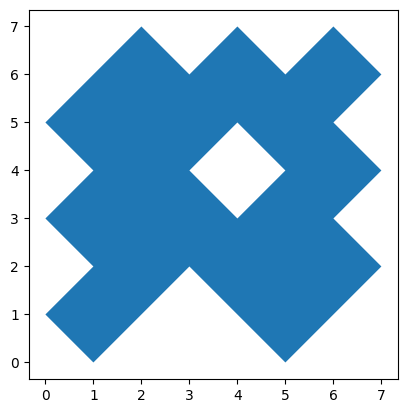

Ignoring the following shape


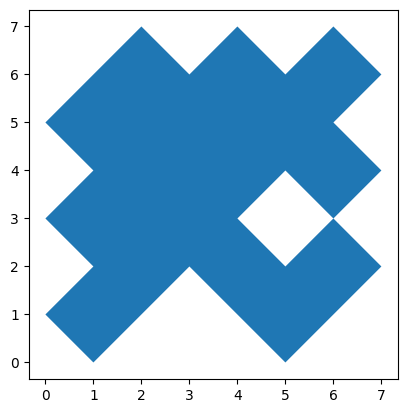

Ignoring the following shape


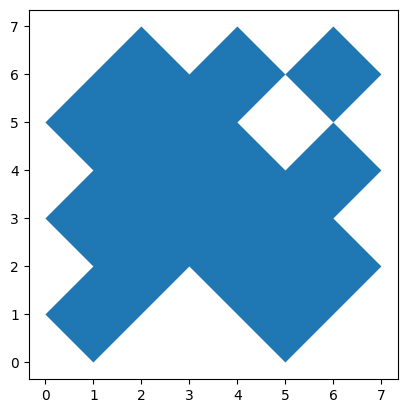

Ignoring the following shape


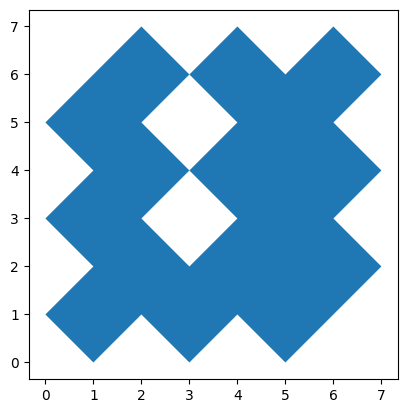

Ignoring the following shape


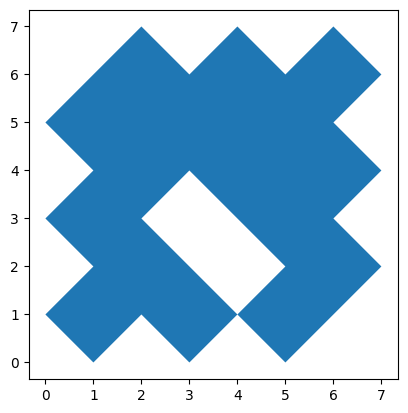

Ignoring the following shape


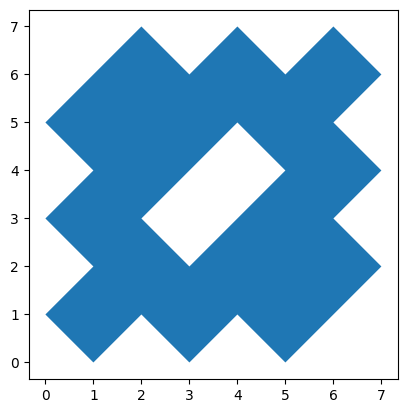

Ignoring the following shape


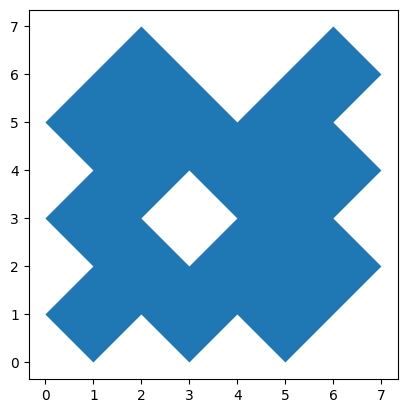

Ignoring the following shape


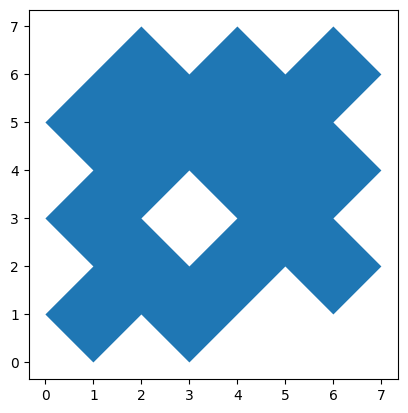

Ignoring the following shape


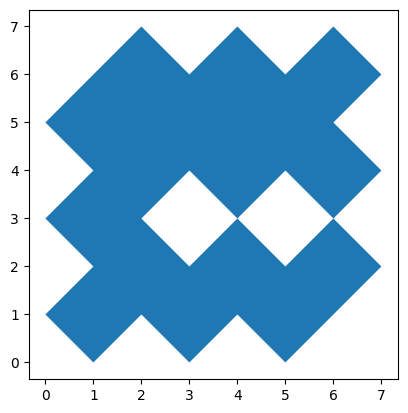

Ignoring the following shape


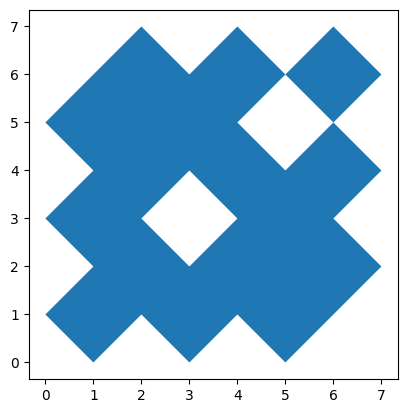

Ignoring the following shape


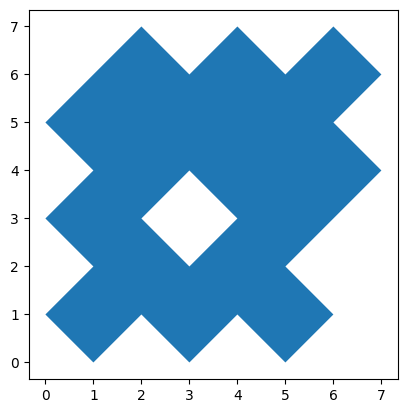

Ignoring the following shape


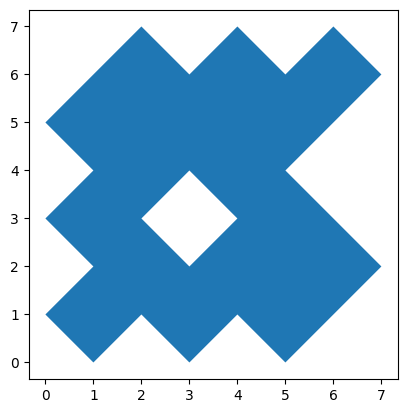

Ignoring the following shape


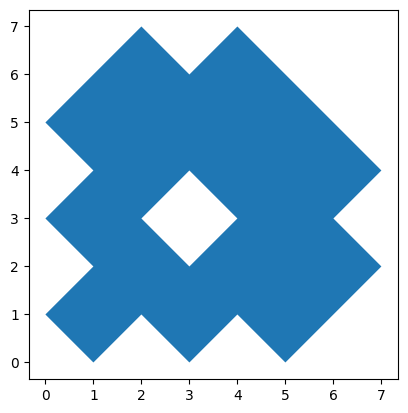

Ignoring the following shape


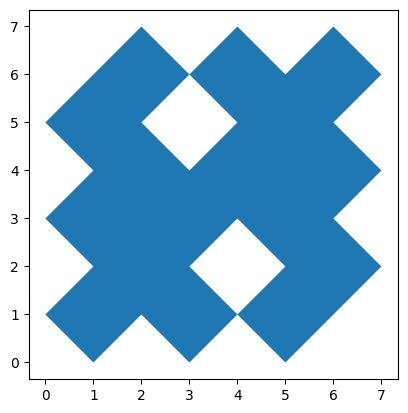

Ignoring the following shape


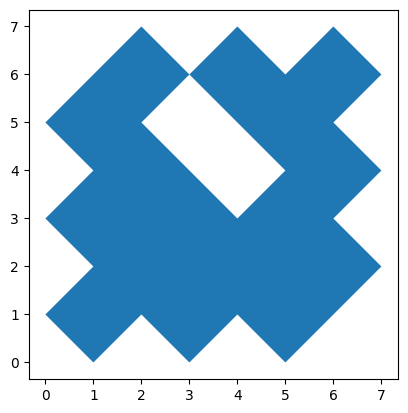

Ignoring the following shape


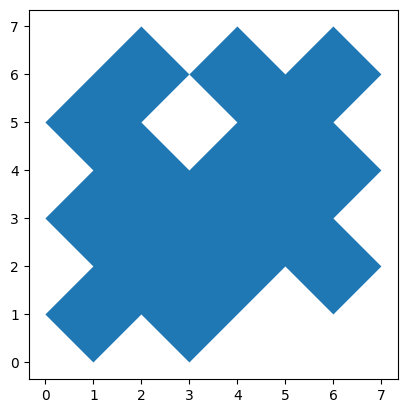

Ignoring the following shape


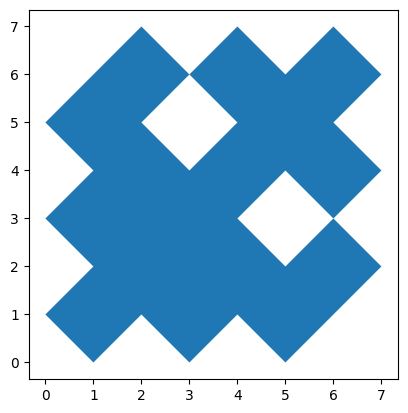

Ignoring the following shape


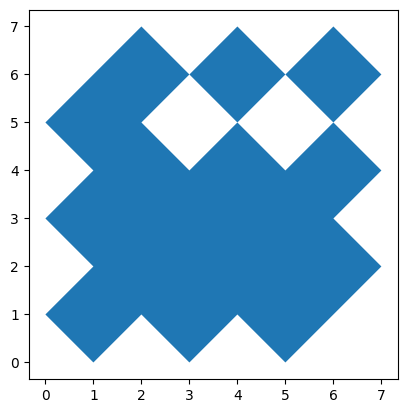

Ignoring the following shape


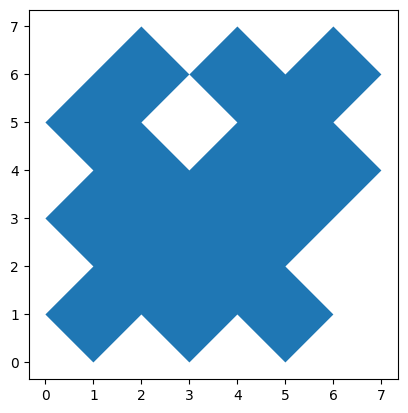

Ignoring the following shape


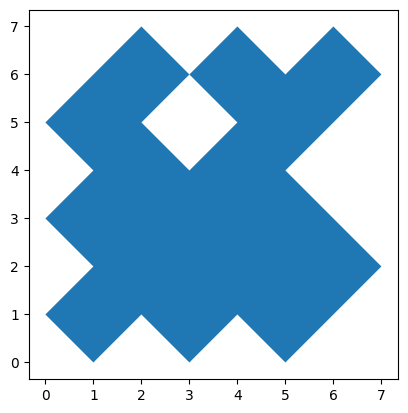

Ignoring the following shape


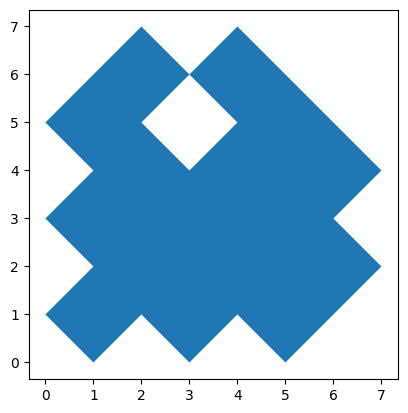

Ignoring the following shape


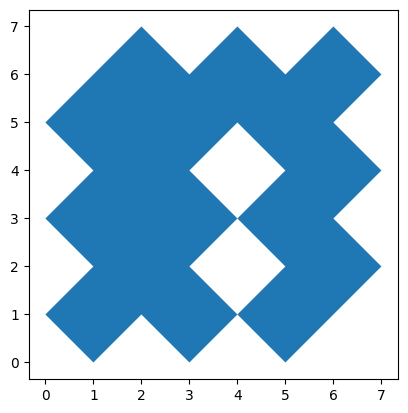

Ignoring the following shape


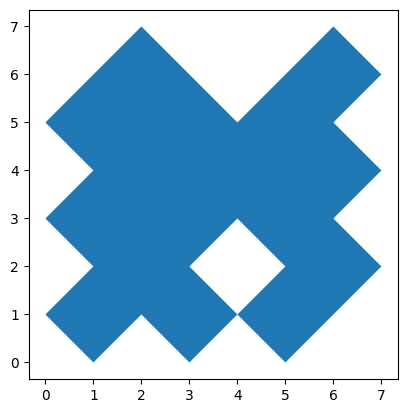

Ignoring the following shape


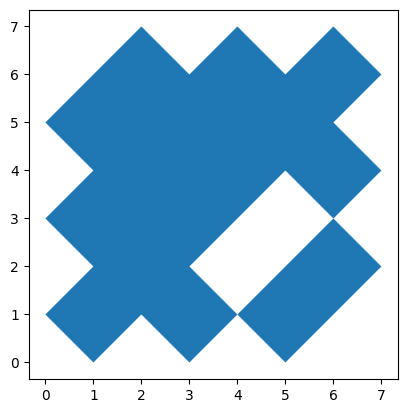

Ignoring the following shape


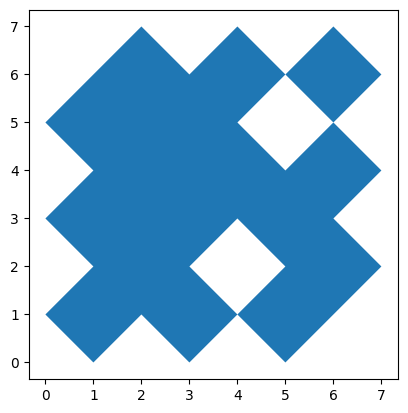

Ignoring the following shape


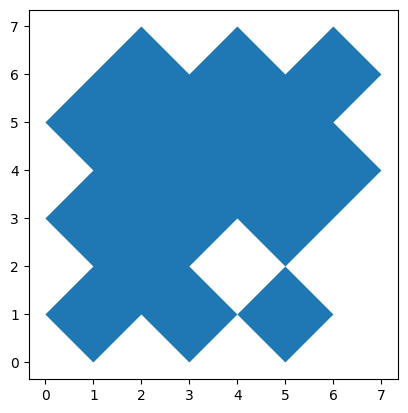

Ignoring the following shape


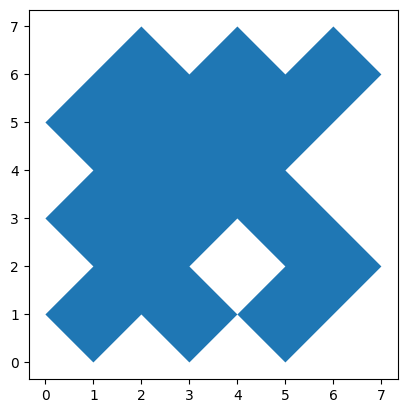

Ignoring the following shape


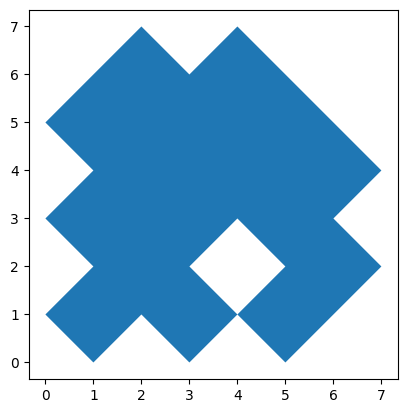

Ignoring the following shape


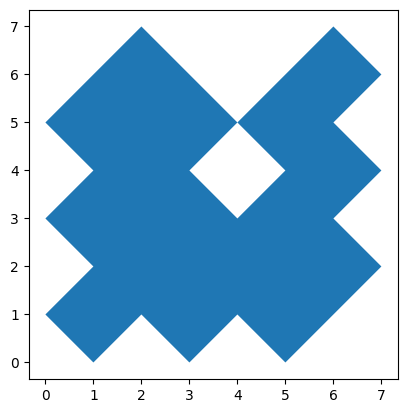

Ignoring the following shape


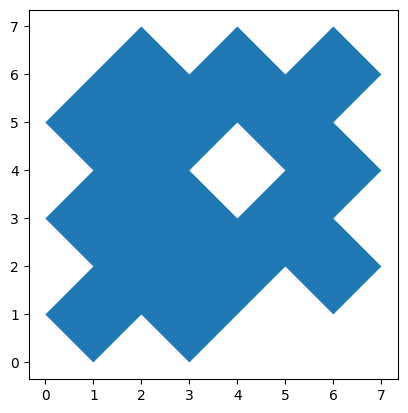

Ignoring the following shape


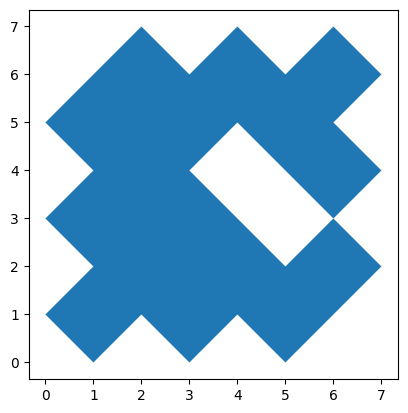

Ignoring the following shape


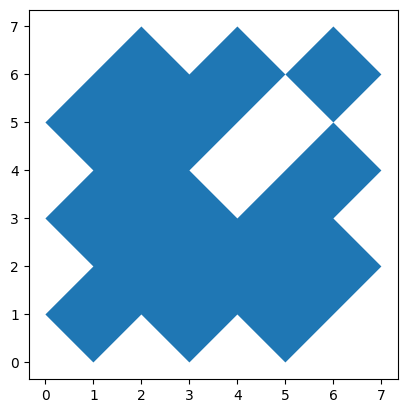

Ignoring the following shape


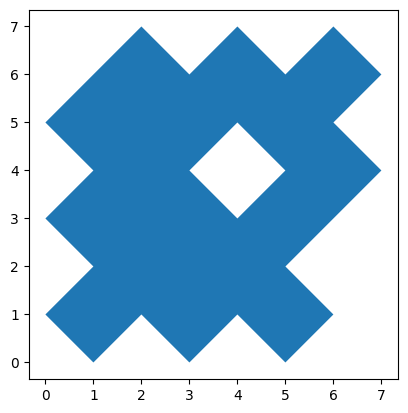

Ignoring the following shape


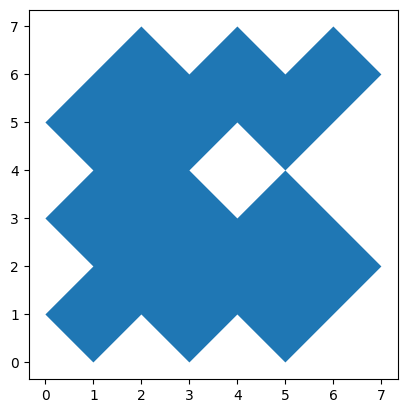

Ignoring the following shape


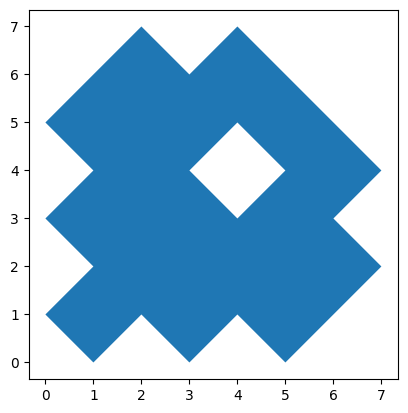

Ignoring the following shape


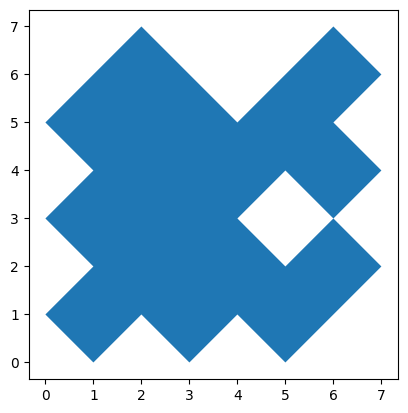

Ignoring the following shape


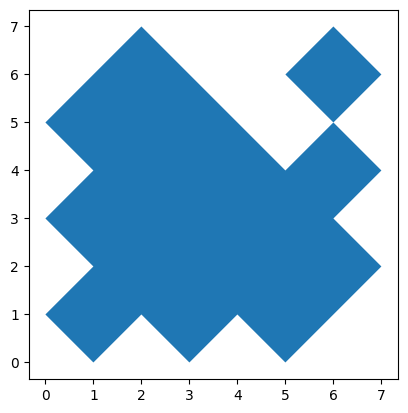

Ignoring the following shape


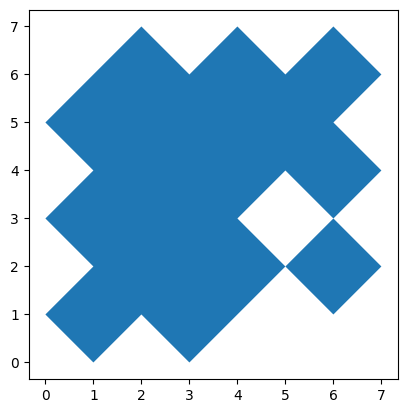

Ignoring the following shape


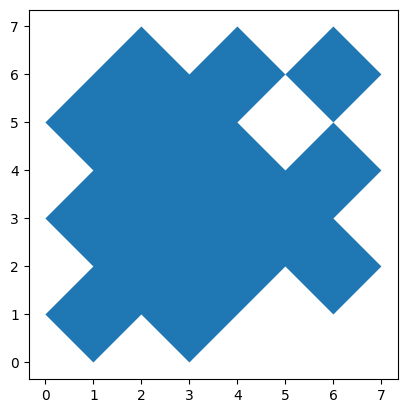

Ignoring the following shape


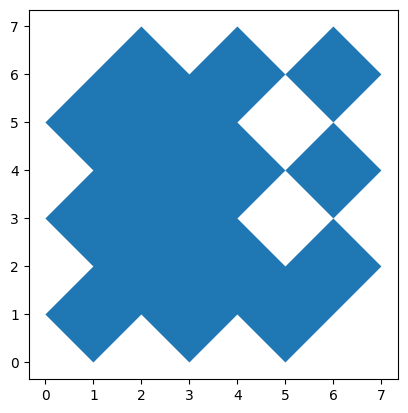

Ignoring the following shape


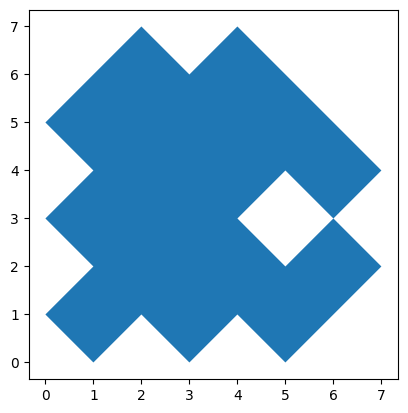

Ignoring the following shape


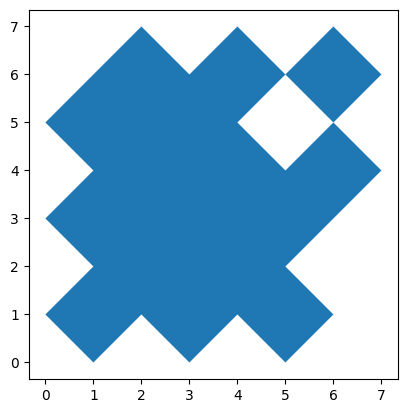

Ignoring the following shape


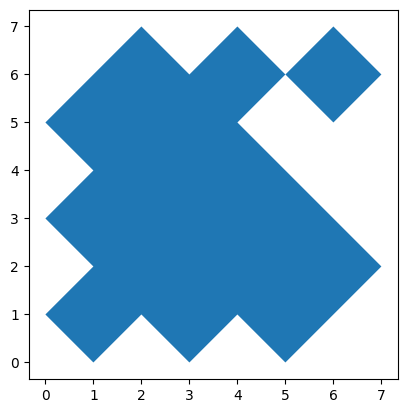

In [5]:
all_shapes = []

for i in range(len(centers)):
    for j in range(i+1, len(centers)):
        selected_centers = [centers[k] for k in range(len(centers)) if k not in (i, j)]
        get_union_shape_from_centers(centers)
        shape = get_union_shape_from_centers(selected_centers)
        if type(shape.boundary) != sh.geometry.multilinestring.MultiLineString:
            all_shapes.append(shape)
        else:
            print("Ignoring the following shape")
            myPoly = gpd.GeoSeries(shape)
            myPoly.plot()
            plt.show()

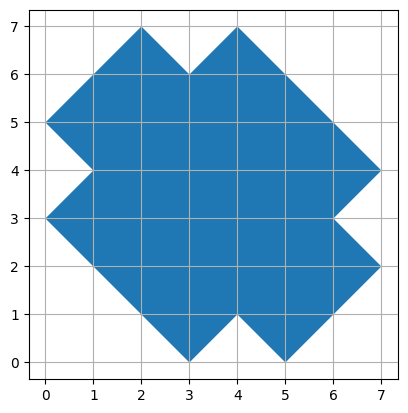

In [8]:
myPoly = gpd.GeoSeries(all_shapes[9])
myPoly.plot()
plt.grid()
plt.show()

In [13]:
nb_of_possibilities = 0

for shape in all_shapes:
    circumpherence = round(shape.boundary.length / np.sqrt(2), 2)
    nb_of_possibilities += math.comb(int(circumpherence), int(circumpherence/2))

nb_of_possibilities

44759572

In [15]:
len(set(all_shapes))

55

## 2) Doing it with the two angled shapes

In [17]:
centers_1 = []
for x in range(1, 7):
    for y in range(1, 7):
        if (x % 2 == 0) and (y % 2 == 0):
            centers_1.append((x, y))
        if (x % 2 == 1) and (y % 2 == 1):
            centers_1.append((x, y))
            
centers_2 = []
for x in range(1, 7):
    for y in range(1, 7):
        if (x % 2 == 1) and (y % 2 == 0):
            centers_2.append((x, y))
        if (x % 2 == 0) and (y % 2 == 1):
            centers_2.append((x, y))

In [33]:
all_shapes_1 = []
for i in range(len(centers_1)):
    for j in range(i+1, len(centers_1)):
        selected_centers = [centers_1[k] for k in range(len(centers_1)) if k not in (i, j)]
        get_union_shape_from_centers(centers_1)
        shape = get_union_shape_from_centers(selected_centers)
        if type(shape.boundary) != sh.geometry.multilinestring.MultiLineString:
            all_shapes_1.append(shape)            

all_shapes_2 = []           
for i in range(len(centers_2)):
    for j in range(i+1, len(centers_2)):
        selected_centers = [centers_2[k] for k in range(len(centers_2)) if k not in (i, j)]
        get_union_shape_from_centers(centers_2)
        shape = get_union_shape_from_centers(selected_centers)
        if type(shape.boundary) != sh.geometry.multilinestring.MultiLineString:
            all_shapes_2.append(shape)
            
all_shapes = all_shapes_1 + all_shapes_2

In [35]:
nb_of_possibilities = 0

for shape in all_shapes:
    circumpherence = round(shape.boundary.length / np.sqrt(2), 2)
    nb_of_possibilities += math.comb(int(circumpherence), int(circumpherence/2))

nb_of_possibilities

89519144